In [1]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 85.1MB/s]


In [2]:
!unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [3]:
import pandas as pd

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
print(df.info)

print(df.describe)

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

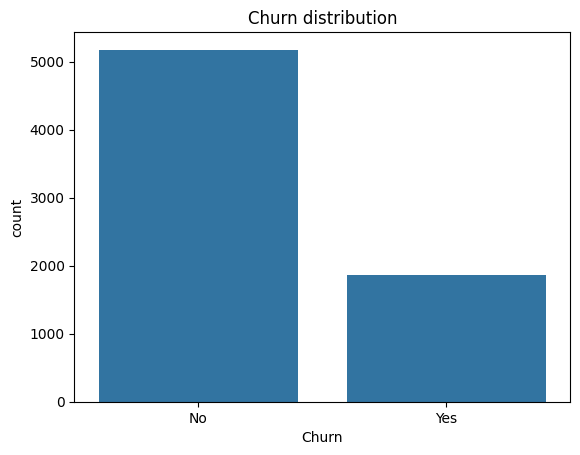

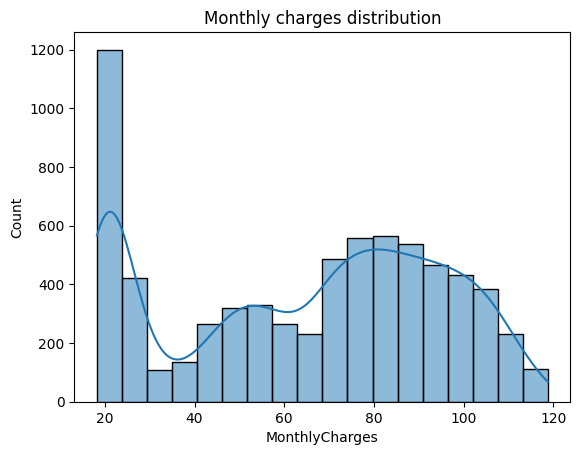

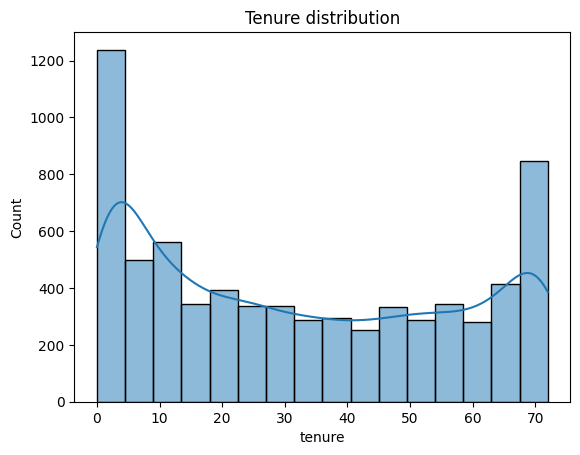

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Churn",data=df)
plt.title("Churn distribution")
plt.show()

sns.histplot(df["MonthlyCharges"],kde=True)
plt.title("Monthly charges distribution")
plt.show()

sns.histplot(df["tenure"],kde=True)
plt.title("Tenure distribution")
plt.show()

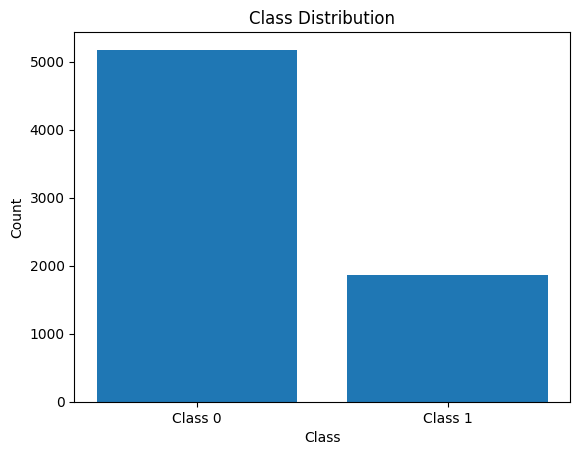

In [7]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

count_class = y.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()


In [64]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

binary_columns = [
    "gender", "Partner", "Dependents",
    "PhoneService", "PaperlessBilling", "Churn"
]

multi_columns = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod"
    ]
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])



df_encoded = pd.get_dummies(df, columns=multi_columns, drop_first=True, dtype=int)
df_encoded.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [45]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_cols])

import pandas as pd
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X = X.drop(columns=categorical_cols)
X = pd.concat([X, encoded_df], axis=1)

print(X.dtypes)


gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
                       ...  
TotalCharges_997.75    int64
TotalCharges_998.1     int64
TotalCharges_999.45    int64
TotalCharges_999.8     int64
TotalCharges_999.9     int64
Length: 13613, dtype: object


In [49]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("New class distribution after SMOTE:")
print(y_resampled.value_counts())


New class distribution after SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8278, 13613)
Testing set size: (2070, 13613)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1021
           1       0.85      0.85      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [76]:
import pandas as pd
import numpy as np

manual_data = pd.DataFrame(np.zeros((1, X_train.shape[1])), columns=X_train.columns)

manual_data.loc[0, "gender"] = 0
manual_data.loc[0, "SeniorCitizen"] = 0
manual_data.loc[0, "Partner"] = 1
manual_data.loc[0, "Dependents"] = 0
manual_data.loc[0, "tenure"] = 19
manual_data.loc[0, "PhoneService"] = 1
manual_data.loc[0, "PaperlessBilling"] = 1
manual_data.loc[0, "MonthlyCharges"] = 200
manual_data.loc[0, "Contract_Two year"] = 1

manual_prediction = model.predict(manual_data)

print("Churn Prediction:", "Churn" if manual_prediction[0] == 1 else "No Churn")


Churn Prediction: Churn
